# Reference

**Feature Extraction and Statistical Analysis**

Following the same approach used in the affective touch protocol, we extracted the features as summarized in table: 

1. Npeak: Number of significant SMNA peaks wrw
2. AUC: Area under curve of reconstructed phasic signal wrw (mus s)
3. Peak: Maximum amplitude of significant peaks of SMNA signal wrw 
4. Mean Tonic: Mean value of the tonic component within each image time window 


Likewise, the affective touch, a statiscal analysis among the 5 smells were performed on the arousal and valence scores, and on the EDA phasic and tonic features. 

We distinguished the _event-related phasic analysis_ i.e. EDA was studied within a time window of 5s correspondent to the affective stimulus session, and the _non specific fluctuation and tonic analysis_ comprising the tonic level comparison and the differential value of the tonic features between the post- and pre stimulus session.

the difference among the smeels were studied using the **Friedman test**, and in case of rejection of the **Friedman test** null hypothesis, a post-hoc analysis was performaed by means of a **Bonferroni corrected Wilcoxon signed-rank**.

# Import data 

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_8 = pd.read_csv('data/exp_8/EDA.csv' , header= None)
fl_eda_8.columns  = ['eda']
fl_eda_freq_8 = fl_eda_8.iloc[1].values
print(len(fl_eda_8))
print('freq: ', fl_eda_freq_8)
fl_eda_8.head(10)

5288
freq:  [4.]


,eda
0,1.528507e+09
1,4.000000e+00
2,0.000000e+00
3,4.109610e-01
4,4.775340e-01
5,4.839350e-01
6,4.800940e-01
7,4.800940e-01
8,4.775340e-01
9,4.749730e-01


In [3]:
# Sampling frequency 4Hz ~= 0.25s
fl_temp_8 = pd.read_csv('data/exp_8/TEMP.csv' , header= None)
fl_temp_8.columns  = ['temp']
fl_temp_freq_8 = fl_temp_8.iloc[1].values
print(len(fl_temp_8))
print('freq: ', fl_temp_freq_8)
fl_temp_8.head(10)

5290
freq:  [4.]


,temp
0,1.528507e+09
1,4.000000e+00
2,3.491000e+01
3,3.491000e+01
4,3.491000e+01
5,3.491000e+01
6,3.491000e+01
7,3.491000e+01
8,3.491000e+01
9,3.491000e+01


In [4]:
fl_init_time_8 = datetime.datetime.utcfromtimestamp(fl_eda_8.iloc[0]).strftime('%Y-%m-%d %H:%M:%S.000')
fl_init_time_8

'2018-06-09 01:22:37.000'

In [5]:
fl_eda_8 = fl_eda_8.iloc[3:]
fl_temp_8 = fl_temp_8.iloc[3:]

In [6]:
#create index 
fl_time_eda_8 = pd.date_range(start=fl_init_time_8, periods=len(fl_eda_8), 
                              freq=str(1/int(fl_eda_freq_8))+'S')
fl_time_eda_8

DatetimeIndex([       '2018-06-09 01:22:37', '2018-06-09 01:22:37.250000',
               '2018-06-09 01:22:37.500000', '2018-06-09 01:22:37.750000',
                      '2018-06-09 01:22:38', '2018-06-09 01:22:38.250000',
               '2018-06-09 01:22:38.500000', '2018-06-09 01:22:38.750000',
                      '2018-06-09 01:22:39', '2018-06-09 01:22:39.250000',
               ...
               '2018-06-09 01:44:35.750000',        '2018-06-09 01:44:36',
               '2018-06-09 01:44:36.250000', '2018-06-09 01:44:36.500000',
               '2018-06-09 01:44:36.750000',        '2018-06-09 01:44:37',
               '2018-06-09 01:44:37.250000', '2018-06-09 01:44:37.500000',
               '2018-06-09 01:44:37.750000',        '2018-06-09 01:44:38'],
              dtype='datetime64[ns]', length=5285, freq='250L')

In [7]:
fl_time_temp_8 = pd.date_range(start=fl_init_time_8, periods=len(fl_temp_8), 
                              freq=str(1/int(fl_temp_freq_8))+'S')
fl_time_temp_8

DatetimeIndex([       '2018-06-09 01:22:37', '2018-06-09 01:22:37.250000',
               '2018-06-09 01:22:37.500000', '2018-06-09 01:22:37.750000',
                      '2018-06-09 01:22:38', '2018-06-09 01:22:38.250000',
               '2018-06-09 01:22:38.500000', '2018-06-09 01:22:38.750000',
                      '2018-06-09 01:22:39', '2018-06-09 01:22:39.250000',
               ...
               '2018-06-09 01:44:36.250000', '2018-06-09 01:44:36.500000',
               '2018-06-09 01:44:36.750000',        '2018-06-09 01:44:37',
               '2018-06-09 01:44:37.250000', '2018-06-09 01:44:37.500000',
               '2018-06-09 01:44:37.750000',        '2018-06-09 01:44:38',
               '2018-06-09 01:44:38.250000', '2018-06-09 01:44:38.500000'],
              dtype='datetime64[ns]', length=5287, freq='250L')

In [8]:
fl_eda_8 = fl_eda_8.set_index(fl_time_eda_8, drop =True)
fl_eda_8 = fl_eda_8[:]
fl_eda_8 = fl_eda_8.dropna()
print(len(fl_eda_8))
fl_eda_8.head()

5285


,eda
2018-06-09 01:22:37.000,0.410961
2018-06-09 01:22:37.250,0.477534
2018-06-09 01:22:37.500,0.483935
2018-06-09 01:22:37.750,0.480094
2018-06-09 01:22:38.000,0.480094


In [9]:
fl_temp_8 = fl_temp_8.set_index(fl_time_temp_8, drop =True)
fl_temp_8 = fl_temp_8[:]
fl_temp_8 = fl_temp_8.dropna()
print(len(fl_temp_8))
fl_temp_8.head()

5287


,temp
2018-06-09 01:22:37.000,34.91
2018-06-09 01:22:37.250,34.91
2018-06-09 01:22:37.500,34.91
2018-06-09 01:22:37.750,34.91
2018-06-09 01:22:38.000,34.91


## Tags - Marked Time Stamps

In [10]:
tags_8 = pd.read_csv('data/exp_8/tags/tags.csv' , header= None)
tags_8.columns  =  ['tagged_time']
tags_8.head()

,tagged_time
0,1.528508e+09
1,1.528508e+09
2,1.528508e+09
3,1.528508e+09
4,1.528508e+09


In [11]:
tags_8.tagged_time = [datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.000') for x in tags_8.tagged_time]


In [12]:
tags_8.tagged_time

0    2018-06-09 01:30:17.000
1    2018-06-09 01:32:37.000
2    2018-06-09 01:33:23.000
3    2018-06-09 01:33:40.000
4    2018-06-09 01:36:31.000
5    2018-06-09 01:39:33.000
6    2018-06-09 01:41:30.000
7    2018-06-09 01:44:31.000
Name: tagged_time, dtype: object

In [13]:
# tags_7 = tags_7.drop(6)
tags_8= tags_8.reset_index(drop=True)
tags_8['label'] = ['pre-relaxation begins','pre-relaxation ends','will be here talk begins','will be here talk ends',
                  'cold shower begins','cold shower ends','post-relaxation begins','post-relaxation ends']

In [14]:
tags_8

,tagged_time,label
0,2018-06-09 01:30:17.000,pre-relaxation begins
1,2018-06-09 01:32:37.000,pre-relaxation ends
2,2018-06-09 01:33:23.000,will be here talk begins
3,2018-06-09 01:33:40.000,will be here talk ends
4,2018-06-09 01:36:31.000,cold shower begins
5,2018-06-09 01:39:33.000,cold shower ends
6,2018-06-09 01:41:30.000,post-relaxation begins
7,2018-06-09 01:44:31.000,post-relaxation ends


## Remove outliers

In [15]:
fl_exp8 = fl_eda_8.copy()#example dataset of normally distributed data. 
fl_exp8['temp'] = fl_temp_8['temp']
fl_exp8['present'] = 1
# fl_exp6 = fl_exp6.reset_index(drop= True)?

fl_exp8 = fl_exp8[np.abs(fl_exp8.eda-fl_exp8.eda.mean())<=(3*fl_exp8.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp8 = fl_exp8[~(np.abs(fl_exp8.eda-fl_exp8.eda.mean())>(3*fl_exp8.eda.std()))] #or if you prefer the other way around
fl_exp8 = fl_exp8.dropna()
print(len(fl_exp8))
fl_exp8.head()

5283


,eda,temp,present
2018-06-09 01:22:37.000,0.410961,34.91,1
2018-06-09 01:22:37.250,0.477534,34.91,1
2018-06-09 01:22:37.500,0.483935,34.91,1
2018-06-09 01:22:37.750,0.480094,34.91,1
2018-06-09 01:22:38.000,0.480094,34.91,1


## Pre- and Post- Relaxation sessions 


In [16]:
fl_pre_8 = fl_exp8.loc[tags_8.tagged_time[0]:tags_8.tagged_time[1]]
fl_pre_8.head()

,eda,temp,present
2018-06-09 01:30:17.000,0.458330,35.59,1
2018-06-09 01:30:17.250,0.445528,35.59,1
2018-06-09 01:30:17.500,0.451929,35.59,1
2018-06-09 01:30:17.750,0.451929,35.57,1
2018-06-09 01:30:18.000,0.451929,35.57,1


In [17]:
len(fl_pre_8)

564

In [18]:
fl_post_8 = fl_exp8.loc[tags_8.tagged_time[6]:tags_8.tagged_time[7]]
fl_post_8.head()

,eda,temp,present
2018-06-09 01:41:30.000,0.40840,34.68,1
2018-06-09 01:41:30.250,0.40840,34.68,1
2018-06-09 01:41:30.500,0.40840,34.68,1
2018-06-09 01:41:30.750,0.40712,34.71,1
2018-06-09 01:41:31.000,0.40840,34.71,1


In [19]:
len(fl_post_8)

728

In [20]:
fl_post_8 = fl_post_8[:len(fl_pre_8)]
len(fl_post_8)

564

# Visualization 

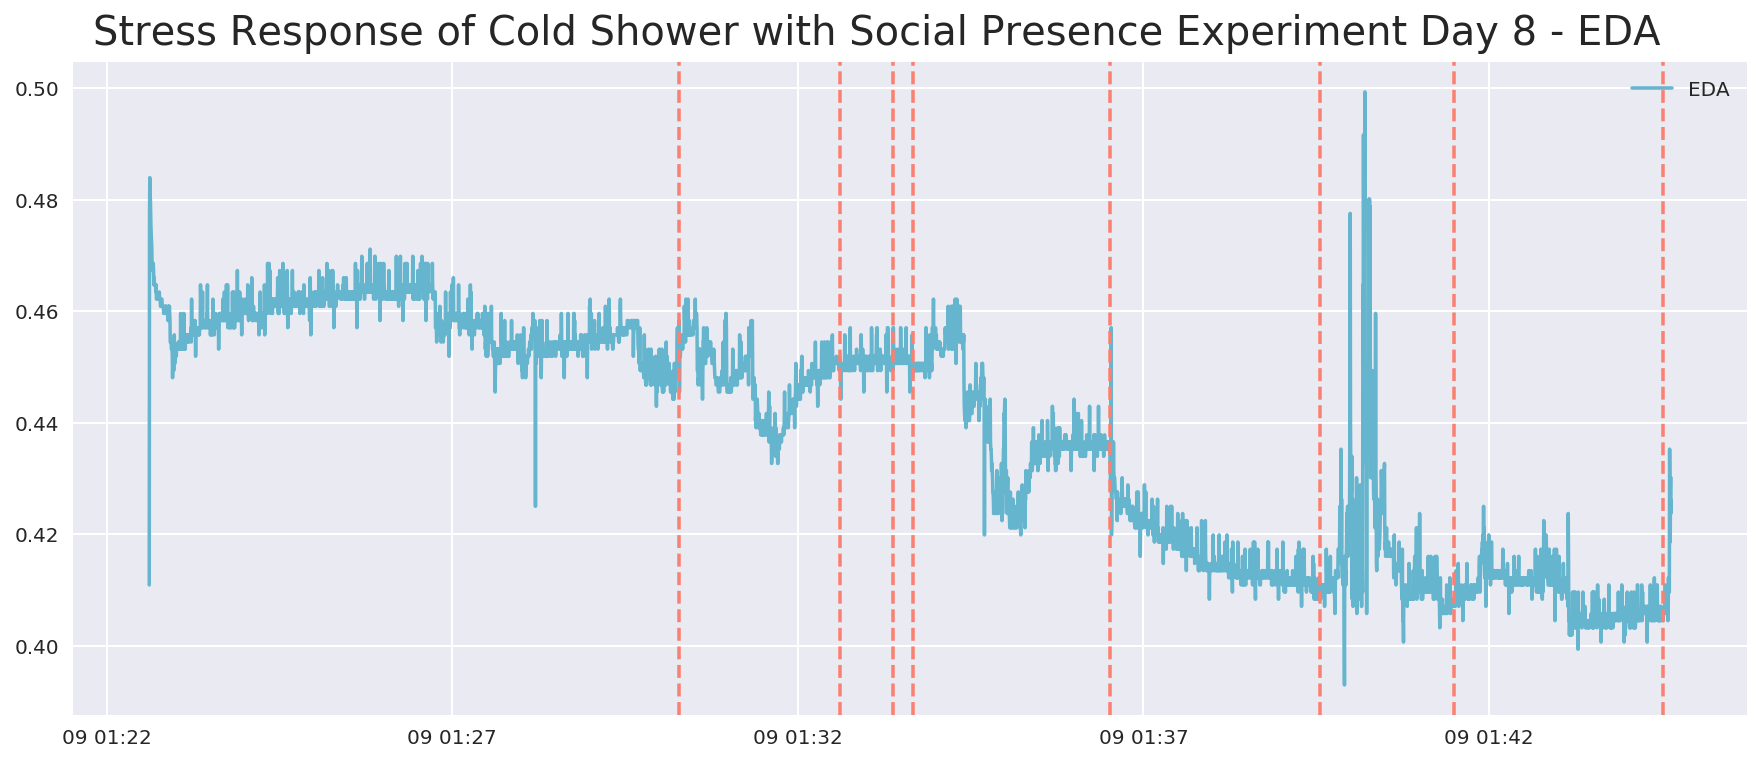

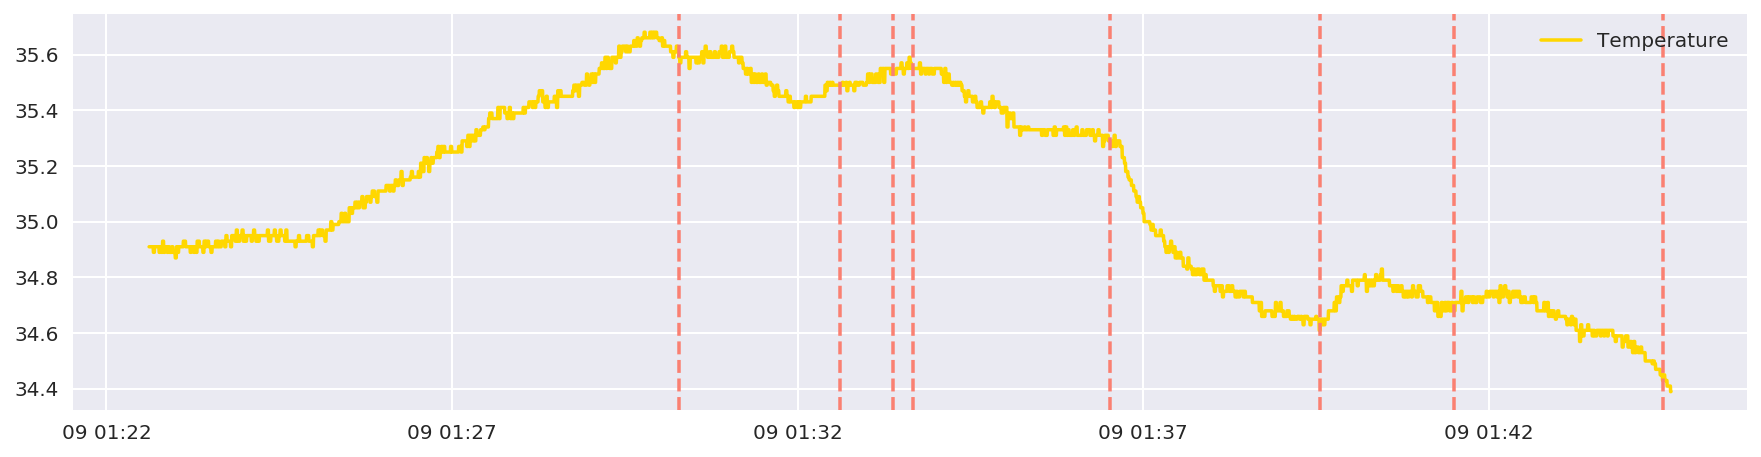

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(111)

plt.plot(fl_exp8['eda'],color ='c')
plt.figtext(.5,.9,'Stress Response of Cold Shower with Social Presence Experiment Day 8 - EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axvline(x = tags_8.tagged_time[0],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[1],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[2],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[3],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[4],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[5],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[6],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[7],color = 'salmon',linestyle='--')
# plt.axvline(x = tags_7.tagged_time[8],color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
# plt.figtext(.5,.9,'Cold Shower Experiment Day 6', fontsize=20, ha='center')
plt.show()


plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(fl_exp8['temp'],color='gold')
# plt.figtext(.5,.9,'Cold Shower Experiment Day 7 - Temperature ', fontsize=20, ha='center')

plt.legend(['Temperature'],loc=1,fontsize='medium')
plt.axvline(x = tags_8.tagged_time[0],color = 'salmon',linestyle='--')
# plt.text(x=tags_7.tagged_time[0],y=0,s='pre-relaxation session begins',rotation=90)
plt.axvline(x = tags_8.tagged_time[1],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[2],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[3],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[4],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[5],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[6],color = 'salmon',linestyle='--')
plt.axvline(x = tags_8.tagged_time[7],color = 'salmon',linestyle='--')
# plt.axvline(x = tags_7.tagged_time[8],color = 'salmon',linestyle='--')


# plt.text(x=tags_8.tagged_time[1],y=0,s='pre-relaxation session ends',rotation=90)
# plt.text(x=tags_8.tagged_time[5],y=0,s='cold shower begins - temperature 65F',rotation=90)
# plt.text(x=tags_8.tagged_time[6],y=0,s='cold shower ends - temperature 65F',rotation=90)
# plt.text(x=tags_8.tagged_time[7],y=0,s='post-relaxation session begins',rotation=90)
# # plt.text(x=tags_8.tagged_time[8],y=0,s='post-relaxation session ends',rotation=90)

# plt.title('Cold Shower Experiment Day 0')


## Pearson Correlation Test Between EDA and Temperature

In [23]:
from scipy.stats.stats import pearsonr
pearsonr(fl_exp8['eda'], fl_exp8['temp'])

(0.6626437524450806, 0.0)

# CvxEDA Model - Phasic and Tonic Features

In [ ]:
y7 = np.asarray(fl_exp7.eda)
y7[:10]

In [ ]:
yn7 = (y7 - y7.mean()) / y7.std()
Fs = 4.
[r7, p7, t7, l7, d7, e7, obj7] = cvxEDA.cvxEDA(yn7, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm7 = pl.arange(1., len(y7)+1.) / Fs


In [ ]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [ ]:
pl.hold(True)
pl.plot(tm7, yn7)
pl.plot(tm7, r7)
pl.plot(tm7, t7)
pl.plot(tm7, p7,alpha = 0.5)

pl.title('Experiment Day 7 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','Tonic Component','SMNA sparse driver of phasic component',
           ])
plt.show()

# Pre- and Post-experiment Tonic component -  Paired wilcoxon-test

In [ ]:
z_statistic, p_value = wilcoxon(fl_post_7.eda - fl_pre_7.eda)

In [ ]:
print("paired wilcoxon-test p-value", p_value)


# Feature extraction

In [ ]:
def eda_feature(df):
    y = np.asarray(df.eda)
    present = np.mean(df.present)
    yn = (y - y.mean()) / y.std()
    Fs = 4.
    [r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)
    tm = pl.arange(1., len(y)+1.) / Fs
    
    y_mean = np.mean(yn)
    r_mean = np.mean(r)
    p_mean = np.mean(p)
    t_mean = np.mean(t)

    y_stdev = np.std(yn)
    r_stdev = np.std(r)
    p_stdev = np.std(p)
    t_stdev = np.std(t)

    y_max = np.amax(yn)
    r_max = np.amax(r)
    p_max = np.amax(p)
    t_max = np.amax(t)

    feature_list=[]
    feature_list.extend((y_mean,r_mean,p_mean,t_mean,
                    y_stdev,r_stdev,p_stdev,t_stdev,
                    y_max,r_max,p_max,t_max,
                    present))
    return feature_list

In [ ]:
var = [fl_exp7]
feature_arr = [eda_feature(x) for x in var]

# Post-experiment Tonic component